In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

![title](figs/COMPGEOP_TITLE.jpg)

# Chapter 6: Ordinary Differential Equations

## Introduction
Ordinary differential equations (ODEs) and partial differential equations (PDEs) play a central role in modeling physical problems. Although some ODEs can be solved analytically, in most practical cases ODEs **cannot** be solved analytically or the solutions are very difficult. Thanks for the development of modern computing technology, most of ODEs can be solved or approximated by numerical methods, which will be covered in this chapter. 

We will mainly focus on solving first-order ODEs, which is the foundation to solve high-order ODEs and coupled ODEs, which we will briefly introduce at the end of this chapter. 

First-order ODEs has the form of 
$$
y' = f(x,y), \ \ \ y(x_0)=y_0
$$
where $x_0$ and $y_0$ are initial value of the problem and are given. We also assume that the problem has a unique solution on some open interval $a < x < b$ containing $x_0$. 

The methods we use in this section are **step-by-step methods**, which compute approximate numeric values of the solution $y_n = y(x_n)$ at the equidistant points on the x-axis
$$
x_1 = x_0 + h, \ \ \ 
x_2 = x_0 + 2h, \ \ \
x_2 = x_0 + 3h, \ \ \
... \ \ \ 
$$
where the **step size** $h$ is a fixed number, for instance, 0.1 or 0.05 or 0.01. How to choose $h$ and the associated error will be discussed later as well. 

## Euler Method

Let's remind ourselves again on the Taylor series:
$$
y(x+h) = y(x) + hy'(x) + \frac{h^2}{2} y''(x)\  + \  ...
$$
if we approximate the Taylor series only using the first term, 
and substitute the equation we try to solve:
$$
y(x+h) \approx y(x) + h y'(x)
 = y(x) + hf(x,y).
$$
This gives us **Euler method**:
$$
y_{n+1} = y_n + hf(x_n, y_n)
$$

### Python example
Let's solve a simple problem $y'=x+y$, with initial condition $x_0=0, y_0=0$. 
This problem has a analytical solution as $y=e^x-x-1$.

In [41]:
import numpy as np
def euler_int(fun,y0,a,b,N):
    ''' Function uses Euler method to calculate ODE y' = fun(x,y)
    usage: y = euler_int(fun,y0,a,b,N)
    input: 
        fun: function of ODE y'=fun(x,y)
        y0: initial value of y at a
        a: starting value
        b: ending value
        N: number of grid
    output:
        value of x and y between a and b
    written by Ge Jin, gjin@mines.edu, 06/2019
    '''
    h = (b-a)/N;
    x = a+h*np.arange(N+1)
    y = np.zeros(N+1)
    for i in range(1,N+1):
        y[i] = y[i-1] + h*f(x[i-1],y[i-1])
    return x,y

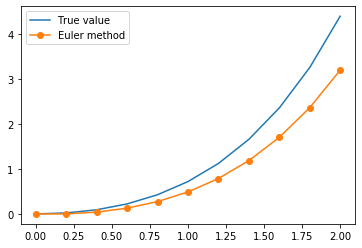

In [46]:

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0; b = 2;
N = 10;
y0 = 0;

# apply Euler method
x,y_euler = euler_int(f,0,0,L,N)

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x,y_ana,label='True value')
plt.plot(x,y_euler,'-o',label='Euler method')
plt.legend()
plt.show()

### Error of the Euler Method
As seen in the python example, Euler method is quite inaccurate. From Taylor's formula, we can estimate its error as:
$$
y(x+h) = y(x) + hy'(x) + \frac{1}{2} h^2 y''(\xi)
$$
where $\xi$ is an unknown value between $x$ and $x+h$. Keep in mind that this is the error of each step, which is called **local truncatoin error**, and is proportional to $h^2$, written $O(h^2)$, where $O$ suggests order. Because the number of steps is proportional to $1/h$, the total error or **global error** is proportional to $h^2(1/h)=h^1$. We can see that Euler method is called a **first-order method**.

### Adaptive Step Size Selection
Euler method does not require the step size to be constant, which gives the opportunity to model softwares to automatically change the step size $h$ based on the function $f$ and a given tolerance $TOL$.

According to the error estimate, the error of $n^{th}$ step with step size $h_n$ can be presented as:
$$
\varepsilon = \frac{1}{2} h^2 y''(\xi)
$$
having $|\varepsilon|=TOL$, we get
$$
\frac{1}{2} h^2 |y''(\xi)| = TOL, \ \ \ \ \ h_n = \sqrt{\frac{2TOL}{|y''(\xi)|}}
$$
and 
$$
y''(\xi) \approx y''(x_{n},y_{n}) = f'(x_{n},y_{n}) = f_x(x_{n},y_{n})+f_y(x_{n},y_{n})f(x_{n},y_{n})
$$


## Improved Euler Method
From previous python example we can see Euler method is quite inaccurate: decrease the step size by half, the error only decrease by half. One way to increase accuracy is to include more terms in Taylor series. However, because $f$ is a function of both $x$ and $y$, higher order derivative of $f$ is difficult to calculate. The **general strategy** now is to avoid the computation of these derivatives and to replace it by computing $f$ for one or several suitably chosen auxiliary values of $(x,y)$. 

In each step of the **improved Euler method** we compute two values, first the **predictor**
$$
y^*_{n+1} = y_n + hf(x_n,y_n),
$$
, and then the **corrector**:
$$
y_{n+1} = y_n + \frac{1}{2}h \left[
f(x_n,y_n) + f(x_{n+1},y^*_{n+1})
\right]
$$
Hence the improved Euler method is a predictor-corrector method: in each step we predict a value and then correct it.

### Python Example

In [43]:
import numpy as np
def improve_euler_int(fun,y0,a,b,N):
    ''' Function uses Euler method to calculate ODE y' = fun(x,y)
    usage: y = euler_int(fun,y0,a,b,N)
    input: 
        fun: function of ODE y'=fun(x,y)
        y0: initial value of y at a
        a: starting value
        b: ending value
        N: number of grid
    output:
        value of x and y between a and b
    written by Ge Jin, gjin@mines.edu, 06/2019
    '''
    h = (b-a)/N;
    x = a+h*np.arange(N+1)
    y = np.zeros(N+1)
    for i in range(1,N+1):
        yp = y[i-1] + h*f(x[i-1],y[i-1])
        y[i] = y[i-1] + h/2*(f(x[i-1],y[i-1])+f(x[i],yp))
    return x,y

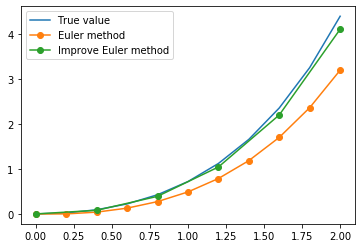

In [48]:

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
a = 0; b = 2;
N = 10;
y0 = 0;

# apply Euler method
x,y_euler = euler_int(f,0,0,L,N)
# apply Improved Euler method, with the same function evaluation time as Euler method
x_imp,y_imp= improve_euler_int(f,0,0,L,N//2)

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x,y_ana,label='True value')
plt.plot(x,y_euler,'-o',label='Euler method')
plt.plot(x_imp,y_imp,'-o',label='Improve Euler method')
plt.legend()
plt.show()

### Error of the Improved Euler Method
From the python example we can see that even with the same number of function evaluation times, improved Euler method provides much higher precision than the Euler method. This is due to improved Euler method is a **second-order method**. 

Setting $\tilde{f_n} = f(x_n,y(x_n))$, and from Taylor series
$$
y(x_n+h) - y(x_n) = h \tilde{f_n} + \frac{1}{2}h^2 \tilde{f'_n} 
+ \frac{1}{6}h^3 \tilde{f''_n} + \dots
$$
Using improved Euler method, we have
$$
\begin{align}
y_{n+1} - y_n &\approx \frac{1}{2}h\left[ \tilde{f_n} + \tilde{f_n}_{+1} \right] \\
&= \frac{1}{2}h \left[\tilde{f_n} + ( \tilde{f_n} + h \tilde{f'_n} + \frac{1}{2}h^2 \tilde{f''_n} + \dots )\right] \\
&= h \tilde{f_n} + \frac{1}{2}h^2 \tilde{f'_n} 
+ \frac{1}{4}h^3 \tilde{f''_n} + \dots
\end{align}
$$
and the difference between the approximation and Taylor series is
$$
 \frac{1}{6}h^3 \tilde{f''_n} 
- \frac{1}{4}h^3 \tilde{f''_n} + \dots = 
 -\frac{1}{12}h^3 \tilde{f''_n} 
$$
so that the method is of second order. 

It worth noting that improved Euler method approximate $\tilde{f_n}_{+1}$ using $f(x_{n+1},y^*_{n+1})$. 
From Euler method error estimation we know $y_{n+1} = y^*_{n+1} + O(h^2)$, so 
$
\tilde{f_n}_{+1} - f(x_{n+1},y^*_{n+1}) \sim O(h^3),
$
hence does not affect the order of the error.


# Acknowledgement

Most of this teaching material is based on:

Kreyszig, E., 2018. Advanced Engineering Mathematics, 10-th edition.